In [33]:
from IPython.display import IFrame
IFrame(src="http://www.youtube.com/embed/mMwovHK2NrE", width=1920/2, height=1080/2)

In [4]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
# Loading my IBMQ account
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-18 08:46:41,888: Credentials are already in use. The existing account in the session will be replaced.


In [36]:
circuit = QuantumCircuit(3,3)
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport
circuit.barrier() # just a visual aid

# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier() 

# Step 3: Alice measures both qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively
circuit.barrier()

# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)

# Step 5: Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2])


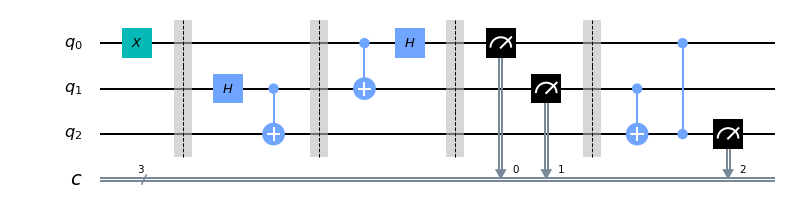

In [37]:
circuit.draw(output='mpl')

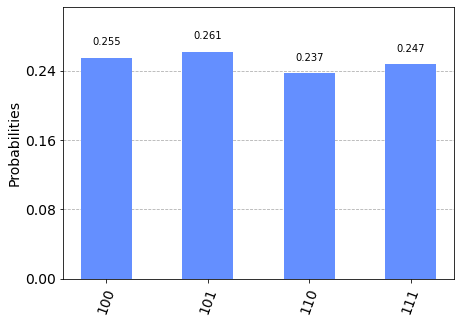

In [44]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))

In [45]:
counts = result.get_counts()
print(counts)

{'100': 261, '101': 267, '110': 243, '111': 253}


In [46]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.1',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.2'}

In [47]:
import qiskit.tools.jupyter
%qiskit_copyright